*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


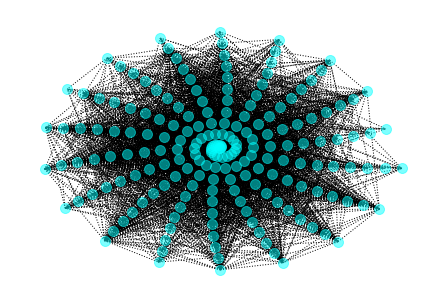

In [1]:
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import tree
import pandas as pd
import numpy as np
jazz = nx.read_gml( 'jazz.gml', label = None)
karate = nx.read_gml('karate.gml', label = None)
jazz_edge_df = nx.to_pandas_edgelist(jazz)
jazz_edge_df
F = nx.from_pandas_edgelist(jazz_edge_df)
nx.draw(F, with_labels = False,
                node_size = 100,
                node_color= [0,1,1,0.5],
                style = 'dotted',
                 font_color = '32',
                 pos=nx.spiral_layout(jazz))
plt.show()

In [52]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)




In [15]:
jazz = nx.read_gml( 'jazz.gml', label = None)
karate = nx.read_gml('karate.gml', label = None)
jazz_edge_df = nx.to_pandas_edgelist(jazz)
jazz_edge_df

,source,target,value,id
0,1,8,2.0,0
1,1,24,2.0,1
2,1,35,2.0,2
3,1,42,2.0,3
4,1,46,2.0,4
...,...,...,...,...
2737,194,196,2.0,5341
2738,194,197,2.0,5342
2739,195,196,2.0,5387
2740,195,197,2.0,5388


100%|██████████| 2000/2000 [00:03<00:00, 645.58it/s]


BarnesHut Approximation  took  0.91  seconds
Repulsion forces  took  1.56  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.16  seconds
AdjustSpeedAndApplyForces step  took  0.22  seconds


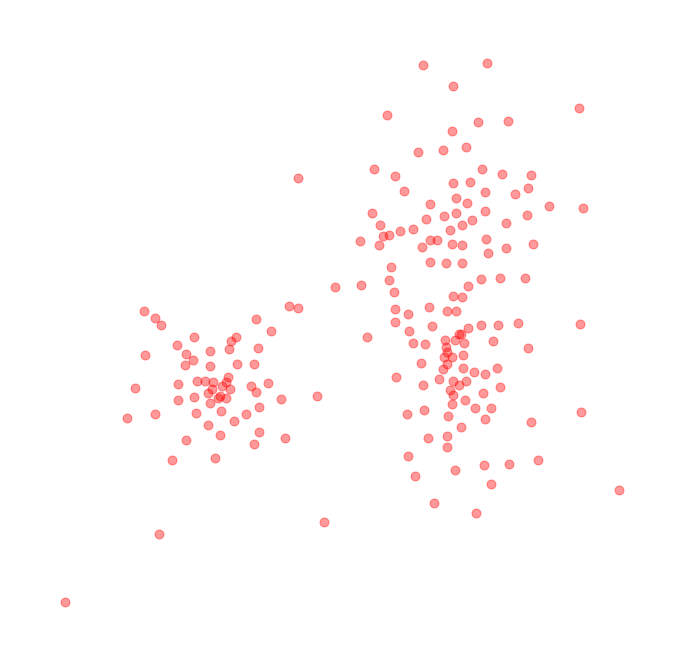

In [45]:

G = nx.random_geometric_graph(400, 0.2)
plt.figure(3,figsize=(12,12))
positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=80, node_color="red", alpha=0.4)
nx.draw_networkx_edges(jazz, positions, edge_color="white", alpha=0.05)
plt.axis('off')
plt.show()

100%|██████████| 2000/2000 [00:00<00:00, 4918.62it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.15  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.06  seconds


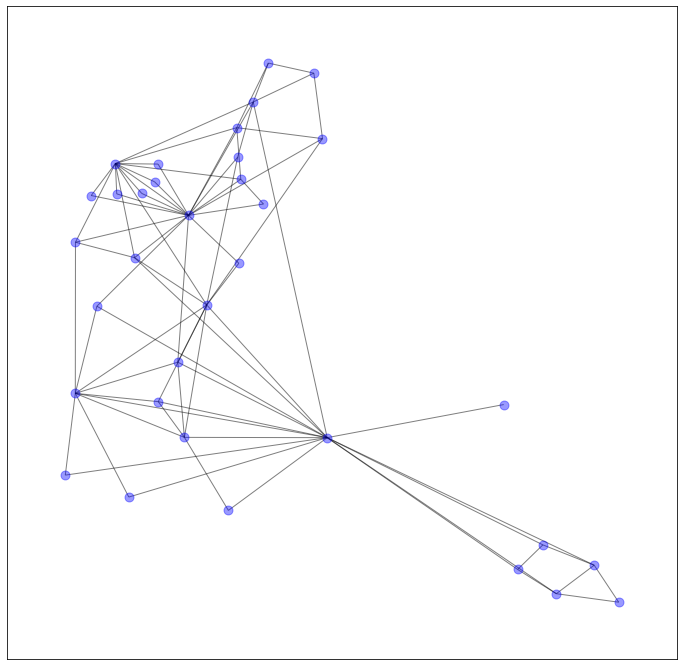

In [29]:

G = nx.random_geometric_graph(400, 0.2)
plt.figure(3,figsize=(12,12))

positions = forceatlas2.forceatlas2_networkx_layout(karate, pos=None, iterations=2000)
nx.draw_networkx_nodes(karate, positions, node_size=80, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(karate, positions, edge_color="black", alpha=0.5)
plt.axis('on')
plt.show()

100%|██████████| 2000/2000 [00:03<00:00, 656.32it/s]


BarnesHut Approximation  took  0.94  seconds
Repulsion forces  took  1.48  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.16  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


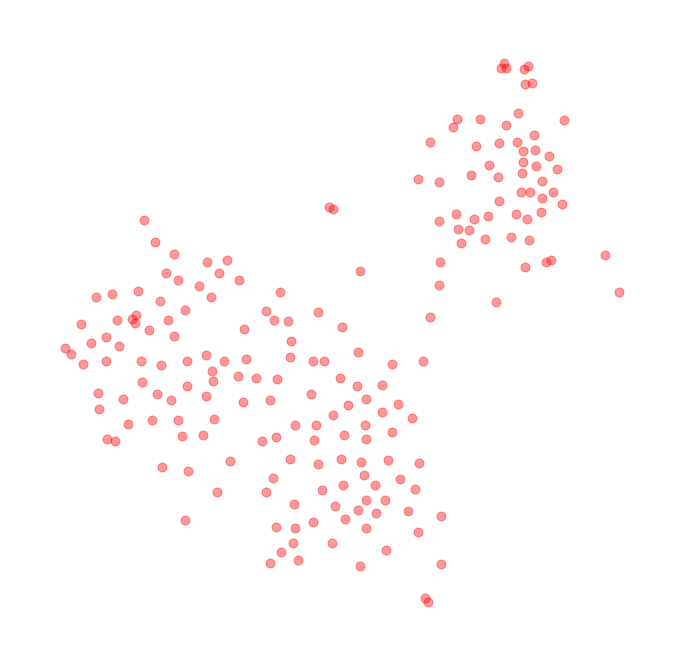

In [44]:
jazz_edge_index_id = jazz_edge_df.set_index('id')
T_jazz = nx.from_pandas_edgelist(jazz_edge_index_id, 'source', 'target', create_using=nx.Graph())
#nx.draw(T_jazz, pos=nx.spring_layout(T_jazz, iterations=150),node_color = [0,1,1,0.5],node_size = 80 )

plt.figure(figsize=(12,12))

#pos=nx.spring_layout(T_jazz, iterations=150)
pos = forceatlas2.forceatlas2_networkx_layout(T_jazz, pos=None, iterations=2000)

nx.draw_networkx_nodes(T_jazz, pos, node_size=80, node_color="red", alpha=0.4)
nx.draw_networkx_edges(T_jazz, pos, edge_color="white", alpha=0.2)
plt.axis('off')
plt.show()


100%|██████████| 2000/2000 [00:02<00:00, 703.98it/s]


BarnesHut Approximation  took  0.78  seconds
Repulsion forces  took  1.43  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.17  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


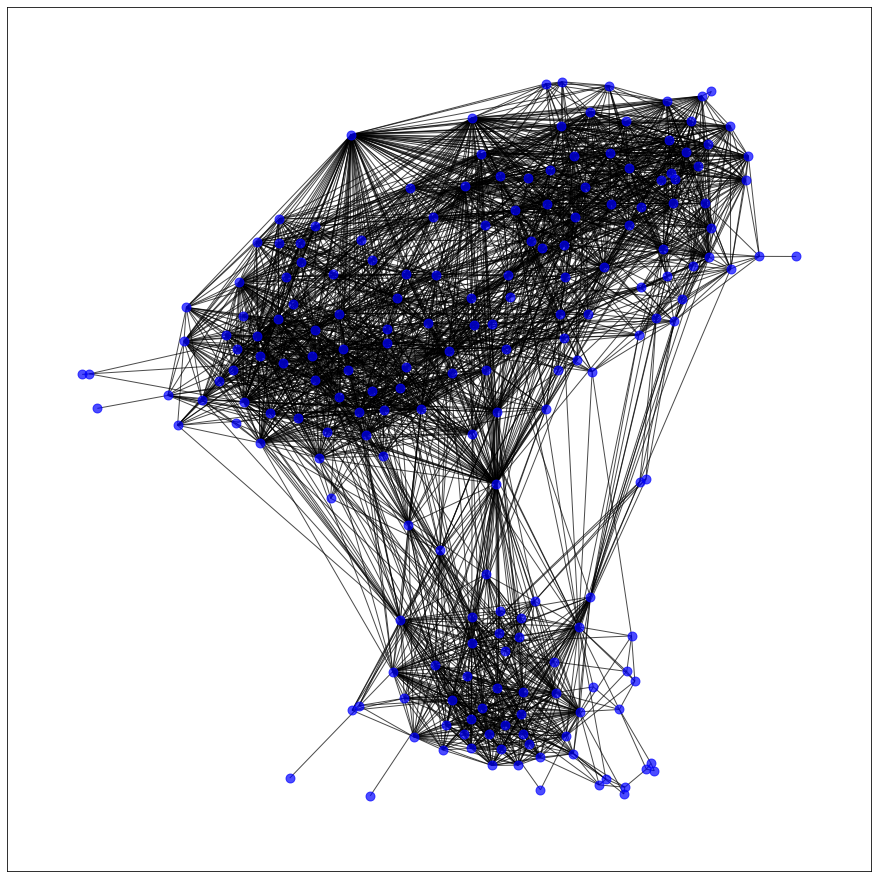

In [50]:
jazz_edge_index_id = jazz_edge_df.set_index('id')
T_jazz = nx.from_pandas_edgelist(jazz_edge_index_id, 'source', 'target', create_using=nx.Graph())

plt.figure(figsize=(12,12))

pos = forceatlas2.forceatlas2_networkx_layout(T_jazz, pos=None, iterations=2000)
nx.draw(T_jazz, pos,node_color = "blue",node_size = 80, alpha=0.7 )

#pos=nx.spring_layout(T_jazz, iterations=150)

#nx.draw_networkx_nodes(T_jazz, pos, node_size=80, node_color="red", alpha=0.4)
#nx.draw_networkx_edges(T_jazz, pos, edge_color="white", alpha=0.2)
plt.axis('on')
plt.show()


100%|██████████| 2000/2000 [00:04<00:00, 455.00it/s]


BarnesHut Approximation  took  1.41  seconds
Repulsion forces  took  2.14  seconds
Gravitational forces  took  0.06  seconds
Attraction forces  took  0.18  seconds
AdjustSpeedAndApplyForces step  took  0.29  seconds


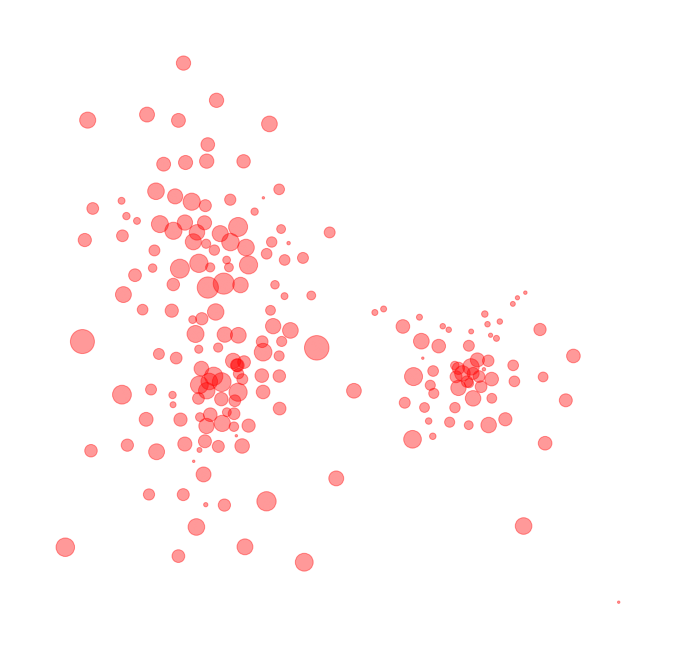

In [58]:
d = dict(jazz.degree)

plt.figure(3,figsize=(12,12))

positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size = [v * 6 for v in d.values()], node_color="red", alpha=0.7)
nx.draw_networkx_edges(jazz, positions, edge_color="white", alpha=0.05)
plt.axis('off')
plt.show()